# Market Basket Analysis on Olist E-Commerce Dataset using Apriori Algorithm

1. Introduction
Market Basket Analysis (MBA) is a data mining technique used to uncover associations between items. It helps retailers understand the purchase behavior of customers by finding associations between the different items that customers place in their shopping baskets.

In this project, we will perform a Market Basket Analysis on the Brazilian e-commerce public dataset provided by Olist. We will use the Apriori algorithm to identify frequent itemsets and generate association rules.



2. Importing Libraries


In [30]:
# Data manipulation libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# For Market Basket Analysis
from mlxtend.frequent_patterns import apriori, association_rules

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

3. Data Loading

In [31]:
# Load datasets
orders = pd.read_csv('olist_orders_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
category_translation = pd.read_csv('product_category_name_translation.csv')


4. Data Exploration

-----------------------

4.1. Previewing Datasets


In [32]:
print("Orders Dataset:")
display(orders.head())

print("Order Items Dataset:")
display(order_items.head())

print("Products Dataset:")
display(products.head())

print("Category Translation Dataset:")
display(category_translation.head())


Orders Dataset:


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


Order Items Dataset:


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


Products Dataset:


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


Category Translation Dataset:


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


4.2. Understanding the Data Structure

---------------------------------------

orders: Contains order details.

----------------------------------------

order_items: Contains items included in each order.



products: Contains product details.

--------------------------------

category_translation: Provides translation of product categories from Portuguese to English.


5. Data Cleaning and Preprocessing
-------------------------------------------

5.1. Checking for Missing Values


In [33]:
# Check for missing values in each dataset
print("Missing values in Orders dataset:")
print(orders.isnull().sum())

print("\nMissing values in Order Items dataset:")
print(order_items.isnull().sum())

print("\nMissing values in Products dataset:")
print(products.isnull().sum())

print("\nMissing values in Category Translation dataset:")
print(category_translation.isnull().sum())


Missing values in Orders dataset:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Missing values in Order Items dataset:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Missing values in Products dataset:
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Missing values in Category Translation dataset:
product_category

5.2. Handling Missing Values
-------------------------

5.2.1. Handling Missing Values in Products Dataset


---------------------------------------------------


The products dataset has missing values in several columns.
We need to handle missing values in product_category_name and other columns.


In [34]:
# Drop rows with missing 'product_category_name'
products.dropna(subset=['product_category_name'], inplace=True)

# Fill missing numerical values with the mean
numeric_cols = ['product_name_lenght', 'product_description_lenght', 'product_photos_qty',
                'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']

for col in numeric_cols:
    products[col].fillna(products[col].mean(), inplace=True)


5.2.2. Verifying Missing Values Handling in Products Dataset


In [35]:
print("Missing values in Products dataset after handling:")
print(products.isnull().sum())


Missing values in Products dataset after handling:
product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64


|

5.3. Merging Datasets


In [36]:
# Merge datasets to create a unified dataframe
data = pd.merge(order_items, products[['product_id', 'product_category_name']], on='product_id', how='left')
data = pd.merge(data, category_translation, on='product_category_name', how='left')
data = pd.merge(data, orders[['order_id', 'order_purchase_timestamp']], on='order_id', how='left')


5.4. Selecting Relevant Columns


In [37]:
# Select relevant columns
data = data[['order_id', 'product_id', 'product_category_name_english', 'order_purchase_timestamp']]


5.5. Checking for Missing Values in Combined Data


In [38]:

# Display the number of missing values
print("Missing values in combined data:")
print(data.isnull().sum())


Missing values in combined data:
order_id                            0
product_id                          0
product_category_name_english    1627
order_purchase_timestamp            0
dtype: int64


In [39]:
# Drop rows with missing 'product_category_name_english'
data.dropna(subset=['product_category_name_english'], inplace=True)

# Verify that missing values are handled
print("Missing values after dropping:")
print(data.isnull().sum())


Missing values after dropping:
order_id                         0
product_id                       0
product_category_name_english    0
order_purchase_timestamp         0
dtype: int64


Extracting Year and Month for Temporal Analysis


In [40]:
# Convert 'order_purchase_timestamp' to datetime
data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'])

# Extract year and month for temporal analysis
data['order_year_month'] = data['order_purchase_timestamp'].dt.to_period('M')


Exploratory Data Analysis (EDA)


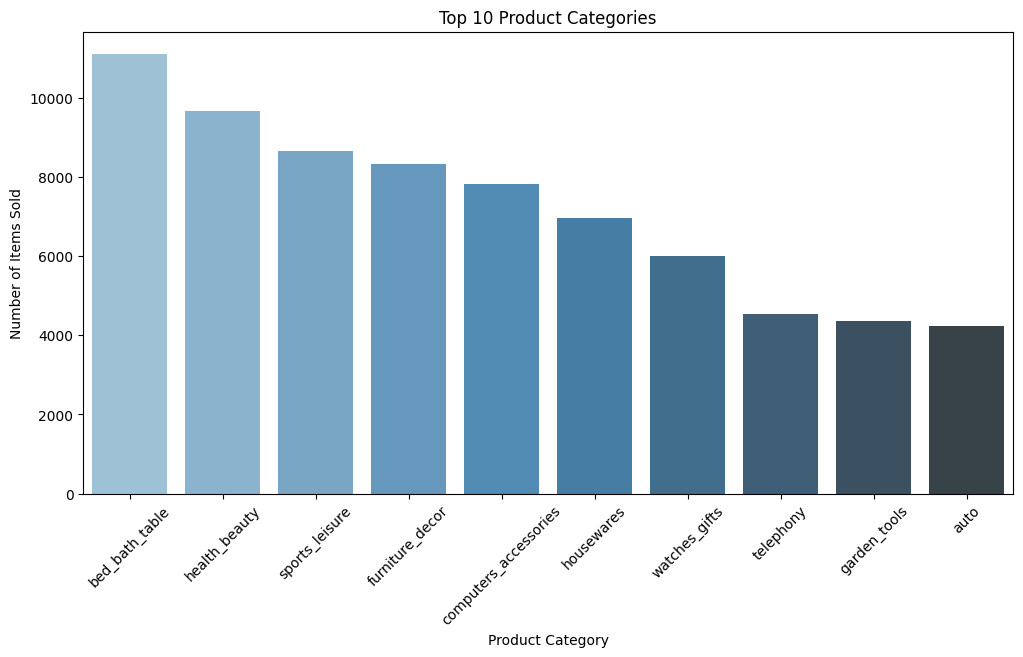

In [41]:
# Get the top 10 product categories by the number of items sold
top_categories = data['product_category_name_english'].value_counts().head(10)

# Plot the top 10 product categories
plt.figure(figsize=(12,6))
sns.barplot(x=top_categories.index, y=top_categories.values, palette='Blues_d')
plt.title('Top 10 Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Number of Items Sold')
plt.xticks(rotation=45)
plt.show()


Number of Orders per Month


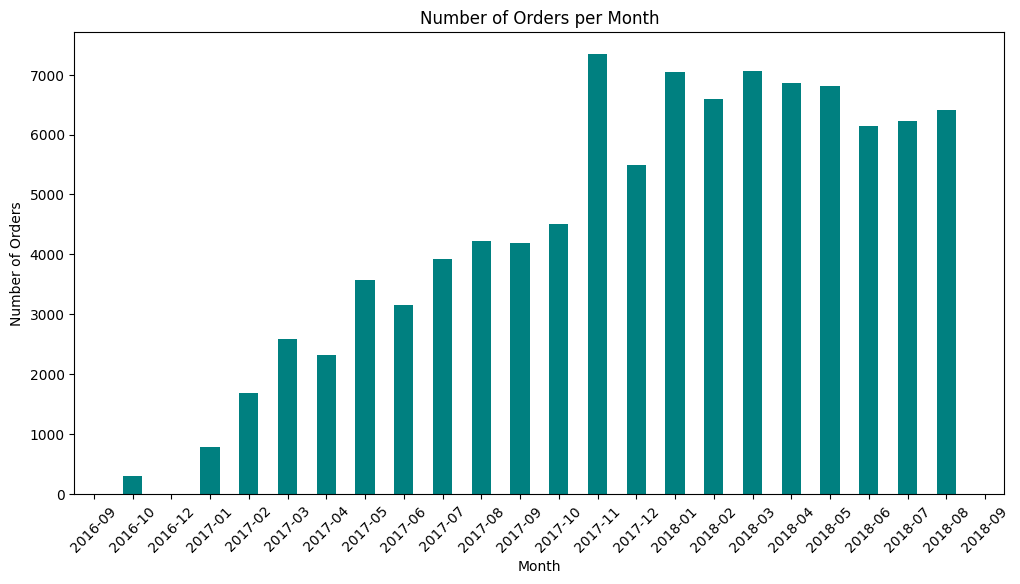

In [42]:
# Calculate the number of unique orders per month
orders_per_month = data.groupby('order_year_month')['order_id'].nunique()

# Plot the number of orders per month
plt.figure(figsize=(12,6))
orders_per_month.plot(kind='bar', color='teal')
plt.title('Number of Orders per Month')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()


Distribution of Order Sizes


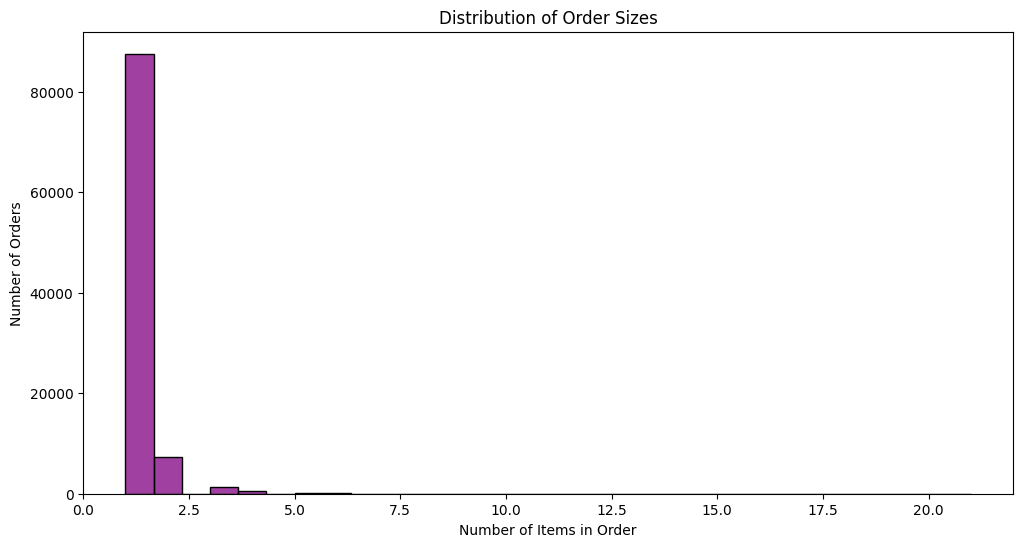

In [43]:
# Calculate the number of items per order
order_sizes = data.groupby('order_id').size()

# Plot the distribution of order sizes
plt.figure(figsize=(12,6))
sns.histplot(order_sizes, bins=30, kde=False, color='purple')
plt.title('Distribution of Order Sizes')
plt.xlabel('Number of Items in Order')
plt.ylabel('Number of Orders')
plt.show()


Data Preparation for Market Basket Analysis
------------------------------------------------------

Creating the Basket
------------------------------

We need to transform the data into a format suitable for the Apriori algorithm. We will create a basket where each row represents an order, and each column represents a product category.



In [44]:
# Create a pivot table with orders and product categories
basket = data.groupby(['order_id', 'product_category_name_english'])['product_category_name_english'] \
             .count().unstack().fillna(0)


Hot Encoding the Data
-----------------------------

We need to encode the quantities into a binary format: 1 if the product category is present in the order, 0 otherwise.



In [45]:
# Define a function to encode the data
def encode_units(x):
    return 1 if x >= 1 else 0

# Apply the encoding function
basket = basket.applymap(encode_units)



Removing Infrequent Items
To reduce the dimensionality, we can remove product categories that are rarely purchased.



In [46]:
# Remove columns (product categories) that were purchased less than 75 times
basket = basket.loc[:, basket.sum() > 75]


Filtering Orders with Multiple Items
---------------------

We focus on orders that contain at least two different product categories.



In [47]:
# Filter orders with at least two items
basket = basket[basket.sum(axis=1) >= 2]


Applying the Apriori Algorithm
>>

In [48]:
# Apply the Apriori algorithm with a minimum support of 0.01
frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)

# Sort the frequent itemsets by support
frequent_itemsets.sort_values('support', ascending=False, inplace=True)


Display the top 10 frequent itemsets:



In [49]:
print("Top 10 Frequent Itemsets:")
frequent_itemsets.head(10)


Top 10 Frequent Itemsets:


,support,itemsets
13,0.285311,(furniture_decor)
2,0.278249,(bed_bath_table)
19,0.142655,(housewares)
1,0.129944,(baby)
15,0.100282,(garden_tools)
35,0.098870,"(furniture_decor, bed_bath_table)"
16,0.098870,(health_beauty)
25,0.093220,(sports_leisure)
7,0.091808,(cool_stuff)
3,0.070621,(computers_accessories)


Generating Association Rules


In [50]:
# Generate association rules
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)

# Sort the rules by lift and confidence
rules.sort_values(['lift', 'confidence'], ascending=[False, False], inplace=True)


Display the top 10 association rules:



In [51]:
print("Top 10 Association Rules:")
rules.head(10)


Top 10 Association Rules:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
12,(health_beauty),(perfumery),0.098870,0.035311,0.016949,0.171429,4.854857,0.013458,1.164280,0.881139
13,(perfumery),(health_beauty),0.035311,0.098870,0.016949,0.480000,4.854857,0.013458,1.732942,0.823084
2,(home_confort),(bed_bath_table),0.070621,0.278249,0.060734,0.860000,3.090761,0.041084,5.155367,0.727857
3,(bed_bath_table),(home_confort),0.278249,0.070621,0.060734,0.218274,3.090761,0.041084,1.188880,0.937241
7,(toys),(baby),0.069209,0.129944,0.026836,0.387755,2.984028,0.017843,1.421092,0.714320
6,(baby),(toys),0.129944,0.069209,0.026836,0.206522,2.984028,0.017843,1.173052,0.764183
5,(cool_stuff),(baby),0.091808,0.129944,0.028249,0.307692,2.367893,0.016319,1.256748,0.636081
4,(baby),(cool_stuff),0.129944,0.091808,0.028249,0.217391,2.367893,0.016319,1.160468,0.663961
9,(sports_leisure),(health_beauty),0.093220,0.098870,0.019774,0.212121,2.145455,0.010557,1.143742,0.588785
8,(health_beauty),(sports_leisure),0.098870,0.093220,0.019774,0.200000,2.145455,0.010557,1.133475,0.592476


Analyzing and Visualizing the Results
--------------------------------

Visualization of Frequent Itemsets


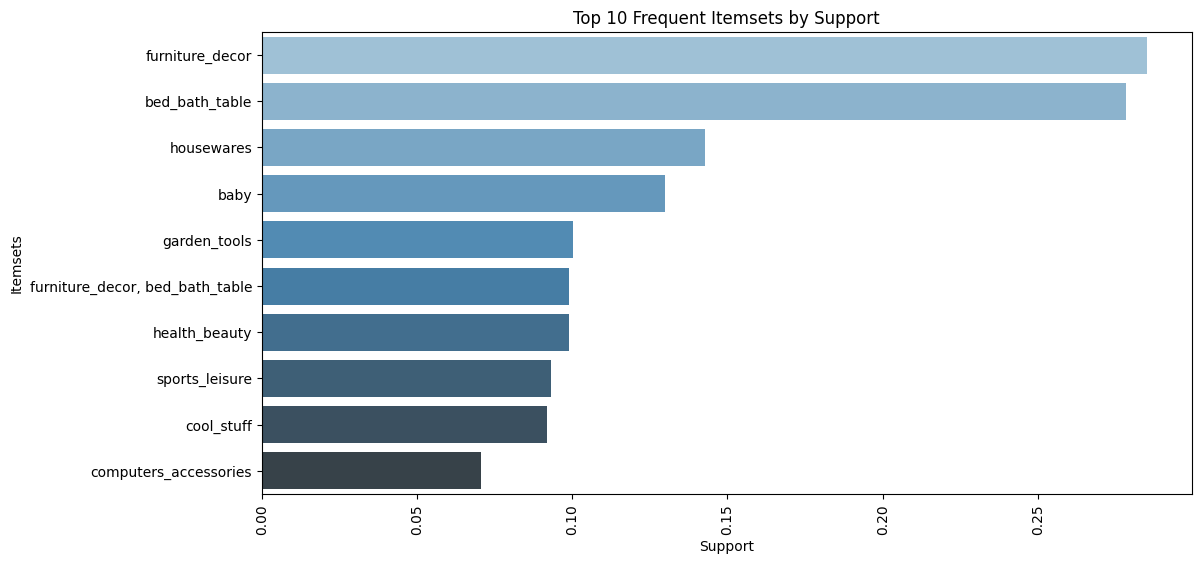

In [52]:
# Visualize the top 10 frequent itemsets
plt.figure(figsize=(12,6))
top_itemsets = frequent_itemsets.head(10)
sns.barplot(x='support', y=top_itemsets['itemsets'].apply(lambda x: ', '.join(list(x))), data=top_itemsets, palette='Blues_d')
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.title('Top 10 Frequent Itemsets by Support')
plt.xticks(rotation=90)
plt.show()


Scatter Plot of Association Rules


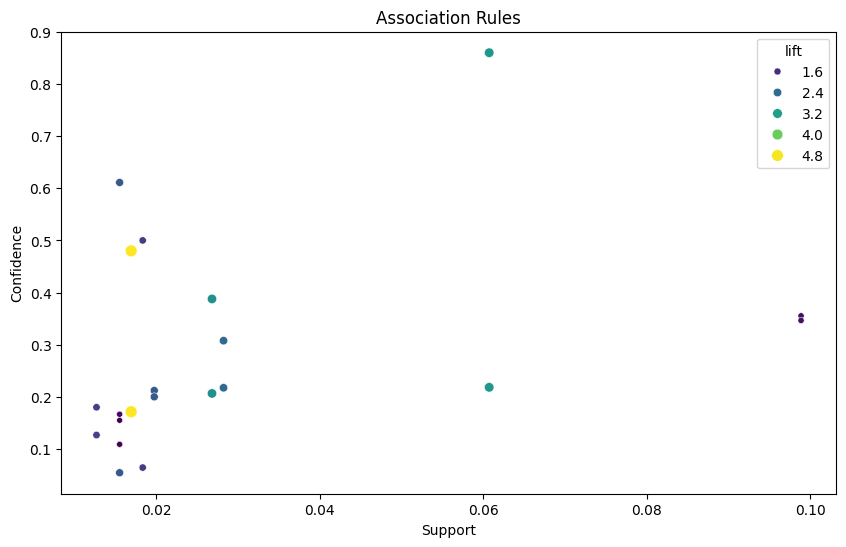

In [53]:
# Plot support vs confidence
plt.figure(figsize=(10,6))
sns.scatterplot(x='support', y='confidence', size='lift', hue='lift', data=rules, palette='viridis', legend=True)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Association Rules')
plt.show()



Heatmap of Lift Values


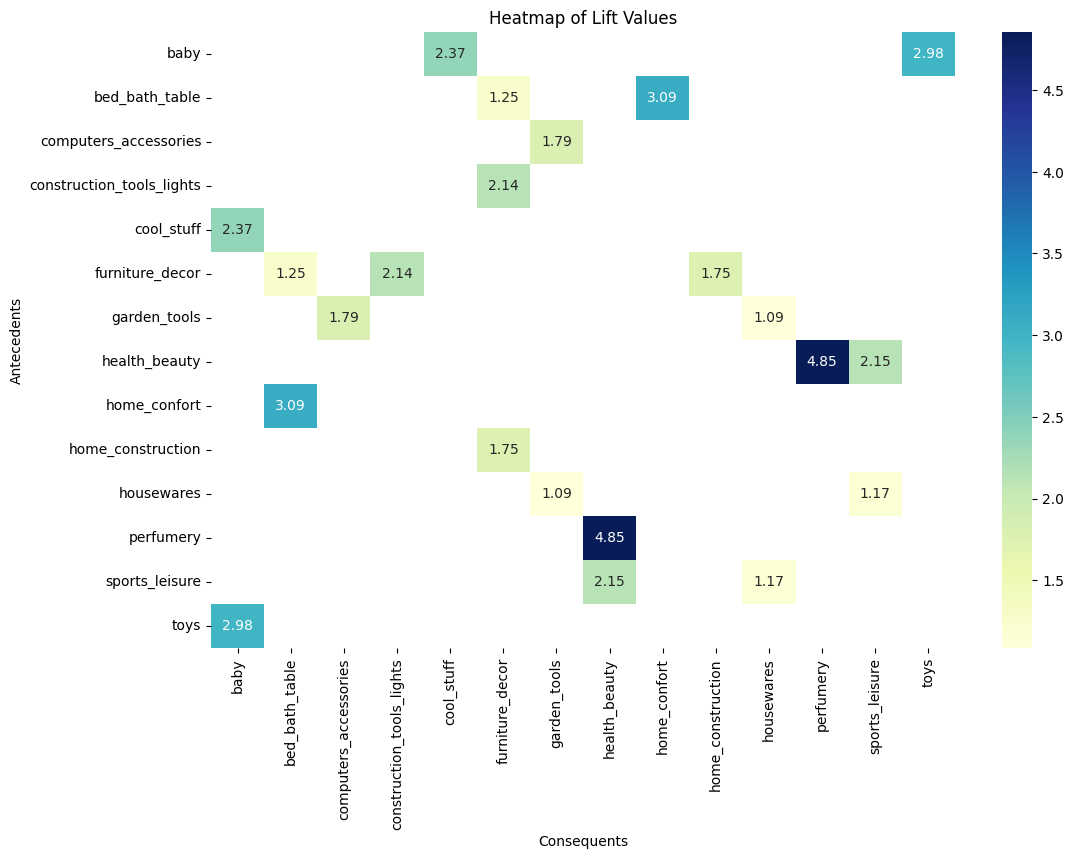

In [54]:
# Prepare data for heatmap
rules['antecedents'] = rules['antecedents'].apply(lambda x: ', '.join(list(x)))
rules['consequents'] = rules['consequents'].apply(lambda x: ', '.join(list(x)))
pivot = rules.pivot(index='antecedents', columns='consequents', values='lift')

# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(pivot, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Heatmap of Lift Values')
plt.xlabel('Consequents')
plt.ylabel('Antecedents')
plt.show()


1. Bar Chart of Top 10 Frequent Itemsets


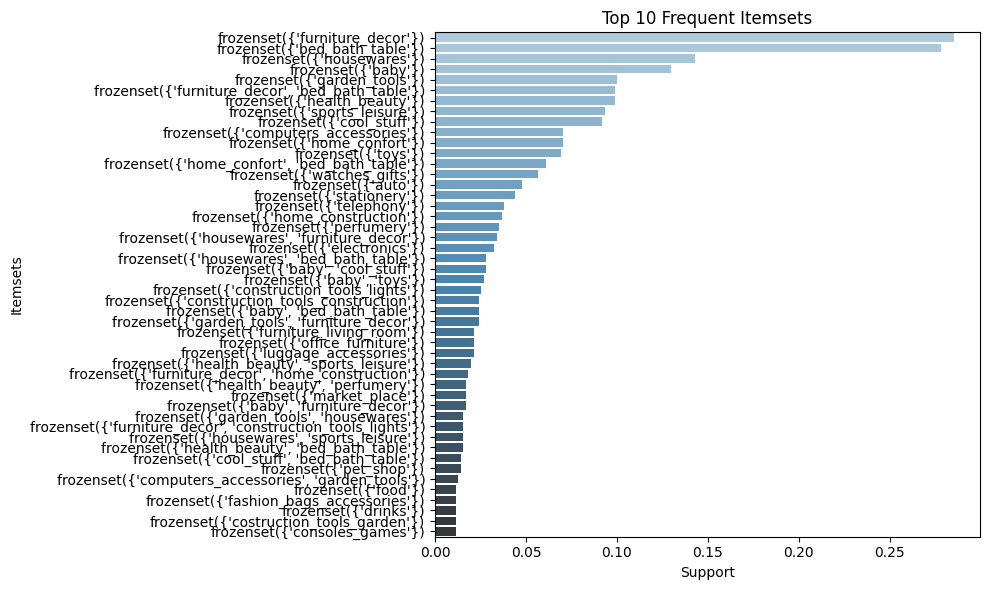

In [55]:
# Plotting the Top 10 Frequent Itemsets
plt.figure(figsize=(10, 6))
sns.barplot(x='support', y='itemsets', data=frequent_itemsets, palette='Blues_d')
plt.title('Top 10 Frequent Itemsets')
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.tight_layout()
plt.show()


2. Bar Chart of Top 10 Association Rules by Lift


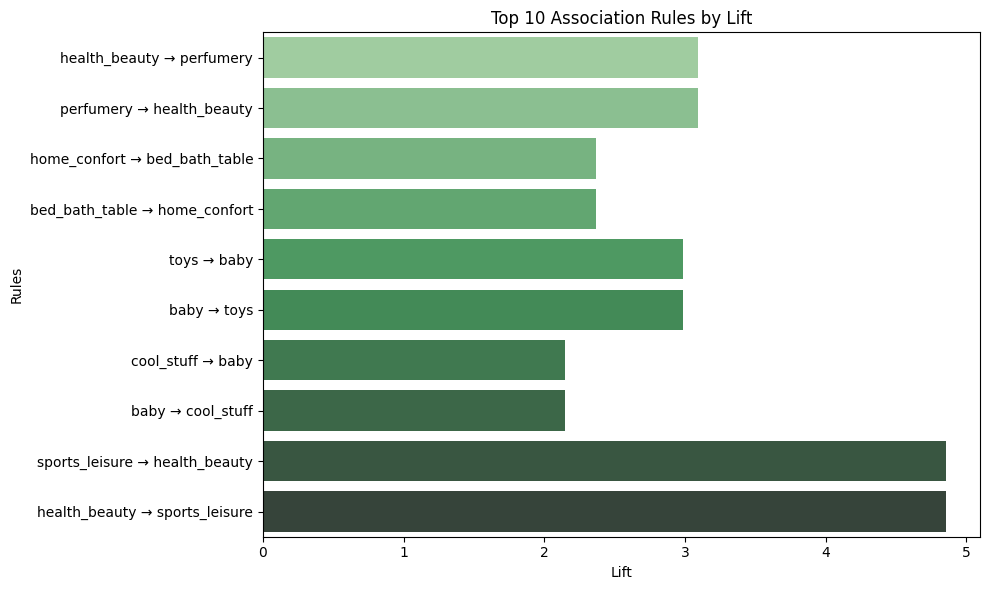

In [56]:
# Plotting the Top 10 Association Rules by Lift
plt.figure(figsize=(10, 6))
rules_to_plot = rules.head(10).sort_values('lift', ascending=False)
sns.barplot(x='lift', y=rules_to_plot.index, data=rules_to_plot, orient='h', palette='Greens_d')
plt.yticks(ticks=range(len(rules_to_plot)), labels=["{} → {}".format(a, c) for a, c in zip(rules_to_plot['antecedents'], rules_to_plot['consequents'])])
plt.title('Top 10 Association Rules by Lift')
plt.xlabel('Lift')
plt.ylabel('Rules')
plt.tight_layout()
plt.show()


3. Scatter Plot of Association Rules (Support vs. Confidence)


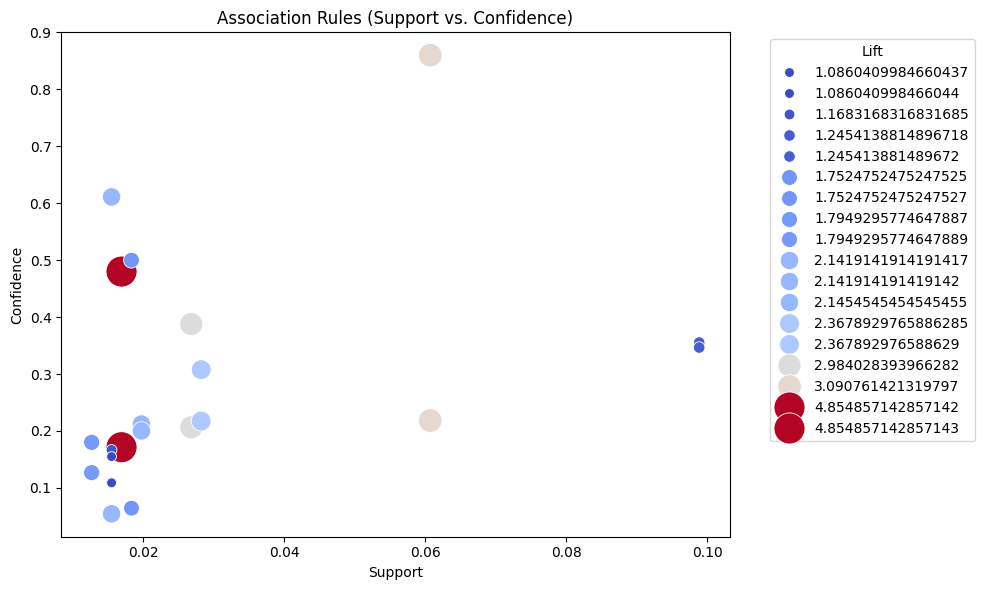

In [57]:
# Scatter Plot of Association Rules
plt.figure(figsize=(10, 6))
sns.scatterplot(x='support', y='confidence', size='lift', sizes=(50, 500), hue='lift', data=rules, palette='coolwarm', legend='full')
plt.title('Association Rules (Support vs. Confidence)')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.legend(title='Lift', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


4. Heatmap of Lift Values Between Antecedents and Consequents


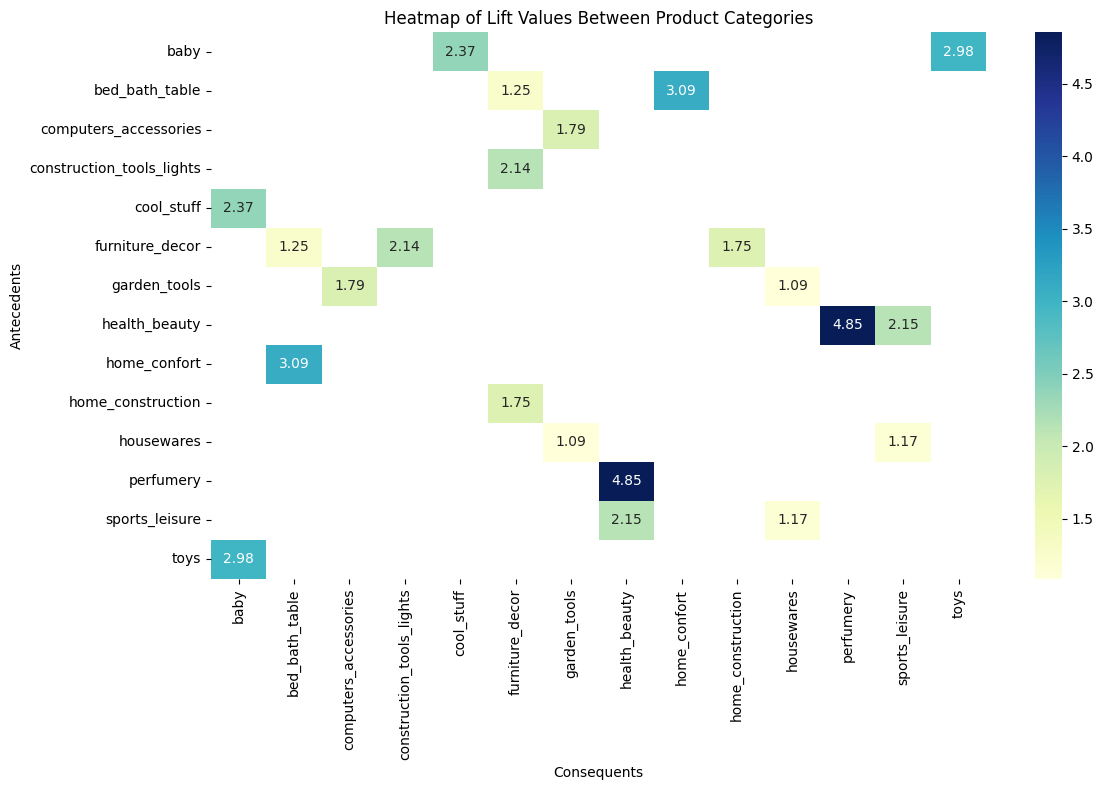

In [58]:
# Creating a Pivot Table for the Heatmap
pivot = rules.pivot(index='antecedents', columns='consequents', values='lift')

# Plotting the Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Heatmap of Lift Values Between Product Categories')
plt.xlabel('Consequents')
plt.ylabel('Antecedents')
plt.tight_layout()
plt.show()
